In [1]:
import pandas as pd

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Data Science\Project Twitter\P96 Project Codes and datsets

03-04-2022  22:31    <DIR>          .
02-04-2022  22:23    <DIR>          ..
03-04-2022  20:44    <DIR>          .ipynb_checkpoints
03-04-2022  22:31            18,998 Deployment.ipynb
03-04-2022  22:09            12,568 features.pkl
03-04-2022  21:13            11,785 output.csv
11-03-2022  21:32            44,862 P96 all tweets.csv
02-04-2022  20:48            28,262 P96 new disaster.csv
03-04-2022  20:19             1,879 Random Forest Final.py
03-04-2022  22:09         1,075,330 Random_Forest_Final.sav
03-04-2022  21:13             2,064 RFDepFinal.py
03-04-2022  22:31             1,725 Tweet_Classification.py
02-04-2022  23:38         1,136,332 Tweets Preprocessing and ML.ipynb
03-04-2022  20:26                 0 untitled
03-04-2022  22:08             6,035 Untitled.ipynb
03-04-2022  22:29             

In [3]:
tweets = pd.read_csv('P96 all tweets.csv')

In [4]:
tweets.drop(['Unnamed: 0','user_location','date','hashtags','keyword'], axis = 1, inplace = True)

## EDA

In [5]:
tweets

,text,LABEL
0,Follow these do's and don'ts to ensure your sa...,0.0
1,#Earthquake | Do you know what to do to #StayS...,0.0
2,.@ndmaindia conducts a state-level mock exerci...,0.0
3,The intensity of the #earthquake was felt at I...,1.0
4,A 5.6-magnitude #earthquake rocked North #Sula...,1.0
...,...,...
157,"#Russian #diplomat blames #NATO's #actions, #W...",0.0
158,#Quran : \n\nNo #disaster #strikes upon the #e...,0.0
159,@antonioguterres @IPCC_CH The writing is on th...,1.0
160,Picking comedians as head of a country or a st...,0.0


In [6]:
tweets.dtypes

text      object
LABEL    float64
dtype: object

In [7]:
tweets.isna().sum()

text     0
LABEL    0
dtype: int64

In [8]:
tweets.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
157    False
158     True
159    False
160    False
161    False
Length: 162, dtype: bool

In [9]:
tweets[tweets.duplicated()]

,text,LABEL
127,20 killed as deadly floods continue to lash Au...,1.0
131,#Quran : \n\nNo #disaster #strikes upon the #e...,0.0
134,#Quran : \n\nNo #disaster #strikes upon the #e...,0.0
141,"#disaster #agency #chief should be #Sacked, #L...",0.0
147,#Quran : \n\nNo #disaster #strikes upon the #e...,0.0
152,#Quran : \n\nNo #disaster #strikes upon the #e...,0.0
158,#Quran : \n\nNo #disaster #strikes upon the #e...,0.0


In [10]:
tweets = tweets.drop_duplicates(keep = False)

In [11]:
tweets.tail(10)

,text,LABEL
150,Pakistan Visa for Afghan nationality in black ...,0.0
151,Have you thought of designing projects that wi...,0.0
153,Chapter 4 #water @IPCC_CH has valuable insight...,0.0
154,Major #disaster in India (1980-2009) https://t...,1.0
155,Fighting in #Ukraine must stop. This is a man ...,1.0
156,#America made the people of Afghanistan a toy\...,0.0
157,"#Russian #diplomat blames #NATO's #actions, #W...",0.0
159,@antonioguterres @IPCC_CH The writing is on th...,1.0
160,Picking comedians as head of a country or a st...,0.0
161,@JguJses @BchhayaB Starting the week with a ta...,0.0


In [12]:
tweets = tweets.reset_index()

In [13]:
tweets.tail(10)

,index,text,LABEL
142,150,Pakistan Visa for Afghan nationality in black ...,0.0
143,151,Have you thought of designing projects that wi...,0.0
144,153,Chapter 4 #water @IPCC_CH has valuable insight...,0.0
145,154,Major #disaster in India (1980-2009) https://t...,1.0
146,155,Fighting in #Ukraine must stop. This is a man ...,1.0
147,156,#America made the people of Afghanistan a toy\...,0.0
148,157,"#Russian #diplomat blames #NATO's #actions, #W...",0.0
149,159,@antonioguterres @IPCC_CH The writing is on th...,1.0
150,160,Picking comedians as head of a country or a st...,0.0
151,161,@JguJses @BchhayaB Starting the week with a ta...,0.0


In [14]:
tweets.drop(['index'], axis = 1, inplace = True)

In [15]:
tweets.LABEL.value_counts()

0.0    87
1.0    65
Name: LABEL, dtype: int64

## Text Preprocessing for WordCloud

In [16]:
import re
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from wordcloud import WordCloud, STOPWORDS

In [17]:
tweets_wc = tweets.copy()
tweets_wc

,text,LABEL
0,Follow these do's and don'ts to ensure your sa...,0.0
1,#Earthquake | Do you know what to do to #StayS...,0.0
2,.@ndmaindia conducts a state-level mock exerci...,0.0
3,The intensity of the #earthquake was felt at I...,1.0
4,A 5.6-magnitude #earthquake rocked North #Sula...,1.0
...,...,...
147,#America made the people of Afghanistan a toy\...,0.0
148,"#Russian #diplomat blames #NATO's #actions, #W...",0.0
149,@antonioguterres @IPCC_CH The writing is on th...,1.0
150,Picking comedians as head of a country or a st...,0.0


In [18]:
tweets_wc.dtypes

text      object
LABEL    float64
dtype: object

In [19]:
tweets_wc = [text.strip() for text in tweets_wc.text] #remove both the leading and trailing characters
tweets_wc = [text for text in tweets_wc if text] # removes empty strings, because they are considered in Python as False
tweets_wc

["Follow these do's and don'ts to ensure your safety before, during and after an #Earthquake. https://t.co/fq58rXVpbf",
 '#Earthquake | Do you know what to do to #StaySafe if outdoors DURING an earthquake? 👇 https://t.co/uL2EJ8QQCU',
 '.@ndmaindia conducts a state-level mock exercise on #Earthquake disaster for the state of Sikkim based on the  Incident Response System (IRS). https://t.co/QihWR83U8X',
 'The intensity of the #earthquake was felt at III MMI (Modified Mercalli Intensity) in Manado city, the capital of the province, Siau island and North Minahasa district. https://t.co/4zGQ77nGJC',
 'A 5.6-magnitude #earthquake rocked North #Sulawesi province in central #Indonesia early on Tuesday, the meteorology, climatology and geophysics agency said. https://t.co/IvEUxFfuup',
 'Must watch\nRoasting video part 2\nhttps://t.co/9XVFqcX7uj\n#Earthquake',
 'Felt an #earthquake 50 minutes ago @LastQuake, any updates?',
 'Earthquake in Guwahati. Did you feel it? \n\n#earthquake #Assam #Guwaha

In [20]:
tweets_text = ' '.join(tweets_wc)
tweets_text

'Follow these do\'s and don\'ts to ensure your safety before, during and after an #Earthquake. https://t.co/fq58rXVpbf #Earthquake | Do you know what to do to #StaySafe if outdoors DURING an earthquake? 👇 https://t.co/uL2EJ8QQCU .@ndmaindia conducts a state-level mock exercise on #Earthquake disaster for the state of Sikkim based on the  Incident Response System (IRS). https://t.co/QihWR83U8X The intensity of the #earthquake was felt at III MMI (Modified Mercalli Intensity) in Manado city, the capital of the province, Siau island and North Minahasa district. https://t.co/4zGQ77nGJC A 5.6-magnitude #earthquake rocked North #Sulawesi province in central #Indonesia early on Tuesday, the meteorology, climatology and geophysics agency said. https://t.co/IvEUxFfuup Must watch\nRoasting video part 2\nhttps://t.co/9XVFqcX7uj\n#Earthquake Felt an #earthquake 50 minutes ago @LastQuake, any updates? Earthquake in Guwahati. Did you feel it? \n\n#earthquake #Assam #Guwahati #earthquake #Guwahati #A

In [21]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['Follow', 'these', "do's", 'and', "don'ts", 'to', 'ensure', 'your', 'safety', 'before', ',', 'during', 'and', 'after', 'an', '#Earthquake', '.', 'https://t.co/fq58rXVpbf', '#Earthquake', '|', 'Do', 'you', 'know', 'what', 'to', 'do', 'to', '#StaySafe', 'if', 'outdoors', 'DURING', 'an', 'earthquake', '?', '👇', 'https://t.co/uL2EJ8QQCU', '.', 'conducts', 'a', 'state-level', 'mock', 'exercise', 'on', '#Earthquake', 'disaster', 'for', 'the', 'state', 'of', 'Sikkim', 'based', 'on', 'the', 'Incident', 'Response', 'System', '(', 'IRS', ')', '.', 'https://t.co/QihWR83U8X', 'The', 'intensity', 'of', 'the', '#earthquake', 'was', 'felt', 'at', 'III', 'MMI', '(', 'Modified', 'Mercalli', 'Intensity', ')', 'in', 'Manado', 'city', ',', 'the', 'capital', 'of', 'the', 'province', ',', 'Siau', 'island', 'and', 'North', 'Minahasa', 'district', '.', 'https://t.co/4zGQ77nGJC', 'A', '5.6-', 'magnitude', '#earthquake', 'rocked', 'North', '#Sulawesi', 'province', 'in', 'central', '#Indonesia', 'early', 'on', 

In [22]:
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'Follow these do\'s and don\'ts to ensure your safety before , during and after an #Earthquake . https://t.co/fq58rXVpbf #Earthquake | Do you know what to do to #StaySafe if outdoors DURING an earthquake ? 👇 https://t.co/uL2EJ8QQCU . conducts a state-level mock exercise on #Earthquake disaster for the state of Sikkim based on the Incident Response System ( IRS ) . https://t.co/QihWR83U8X The intensity of the #earthquake was felt at III MMI ( Modified Mercalli Intensity ) in Manado city , the capital of the province , Siau island and North Minahasa district . https://t.co/4zGQ77nGJC A 5.6- magnitude #earthquake rocked North #Sulawesi province in central #Indonesia early on Tuesday , the meteorology , climatology and geophysics agency said . https://t.co/IvEUxFfuup Must watch Roasting video part 2 https://t.co/9XVFqcX7uj #Earthquake Felt an #earthquake 50 minutes ago , any updates ? Earthquake in Guwahati . Did you feel it ? #earthquake #Assam #Guwahati #earthquake #Guwahati #Assam #Indi

In [23]:
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Follow these dos and donts to ensure your safety before  during and after an Earthquake  httpstcofq58rXVpbf Earthquake  Do you know what to do to StaySafe if outdoors DURING an earthquake  👇 httpstcouL2EJ8QQCU  conducts a statelevel mock exercise on Earthquake disaster for the state of Sikkim based on the Incident Response System  IRS   httpstcoQihWR83U8X The intensity of the earthquake was felt at III MMI  Modified Mercalli Intensity  in Manado city  the capital of the province  Siau island and North Minahasa district  httpstco4zGQ77nGJC A 56 magnitude earthquake rocked North Sulawesi province in central Indonesia early on Tuesday  the meteorology  climatology and geophysics agency said  httpstcoIvEUxFfuup Must watch Roasting video part 2 httpstco9XVFqcX7uj Earthquake Felt an earthquake 50 minutes ago  any updates  Earthquake in Guwahati  Did you feel it  earthquake Assam Guwahati earthquake Guwahati Assam India Who else felt the tremor  Morning shake International Women ’ s Day just

In [24]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Follow these dos and donts to ensure your safety before  during and after an Earthquake   Earthquake  Do you know what to do to StaySafe if outdoors DURING an earthquake  👇   conducts a statelevel mock exercise on Earthquake disaster for the state of Sikkim based on the Incident Response System  IRS    The intensity of the earthquake was felt at III MMI  Modified Mercalli Intensity  in Manado city  the capital of the province  Siau island and North Minahasa district   A 56 magnitude earthquake rocked North Sulawesi province in central Indonesia early on Tuesday  the meteorology  climatology and geophysics agency said   Must watch Roasting video part 2  Earthquake Felt an earthquake 50 minutes ago  any updates  Earthquake in Guwahati  Did you feel it  earthquake Assam Guwahati earthquake Guwahati Assam India Who else felt the tremor  Morning shake International Women ’ s Day just started with a mild Earthquake in Guwahati Nature says BreakTheBias too  🌍 felt just now  earthquake Guwaha

In [25]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Follow', 'these', 'dos', 'and', 'donts', 'to', 'ensure', 'your', 'safety', 'before', 'during', 'and', 'after', 'an', 'Earthquake', 'Earthquake', 'Do', 'you', 'know', 'what', 'to', 'do', 'to', 'StaySafe', 'if', 'outdoors', 'DURING', 'an', 'earthquake', '👇', 'conducts', 'a', 'statelevel', 'mock', 'exercise', 'on', 'Earthquake', 'disaster', 'for', 'the', 'state', 'of', 'Sikkim', 'based', 'on', 'the', 'Incident', 'Response', 'System', 'IRS', 'The', 'intensity', 'of', 'the', 'earthquake', 'was', 'felt', 'at', 'III', 'MMI', 'Modified', 'Mercalli', 'Intensity', 'in', 'Manado', 'city', 'the', 'capital', 'of', 'the', 'province', 'Siau', 'island', 'and', 'North', 'Minahasa', 'district', 'A', '56', 'magnitude', 'earthquake', 'rocked', 'North', 'Sulawesi', 'province', 'in', 'central', 'Indonesia', 'early', 'on', 'Tuesday', 'the', 'meteorology', 'climatology', 'and', 'geophysics', 'agency', 'said', 'Must', 'watch', 'Roasting', 'video', 'part', '2', 'Earthquake', 'Felt', 'an', 'earthquake', '50', 

In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['ye','yeah','haha','Yes','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Follow', 'dos', 'donts', 'ensure', 'safety', 'Earthquake', 'Earthquake', 'Do', 'know', 'StaySafe', 'outdoors', 'DURING', 'earthquake', '👇', 'conducts', 'statelevel', 'mock', 'exercise', 'Earthquake', 'disaster', 'state', 'Sikkim', 'based', 'Incident', 'Response', 'System', 'IRS', 'The', 'intensity', 'earthquake', 'felt', 'III', 'MMI', 'Modified', 'Mercalli', 'Intensity', 'Manado', 'city', 'capital', 'province', 'Siau', 'island', 'North', 'Minahasa', 'district', 'A', '56', 'magnitude', 'earthquake', 'rocked', 'North', 'Sulawesi', 'province', 'central', 'Indonesia', 'early', 'Tuesday', 'meteorology', 'climatology', 'geophysics', 'agency', 'said', 'Must', 'watch', 'Roasting', 'video', 'part', '2', 'Earthquake', 'Felt', 'earthquake', '50', 'minutes', 'ago', 'updates', 'Earthquake', 'Guwahati', 'Did', 'feel', 'earthquake', 'Assam', 'Guwahati', 'earthquake', 'Guwahati', 'Assam', 'India', 'Who', 'else', 'felt', 'tremor', 'Morning', 'shake', 'International', 'Women', '’', 'Day', 'started', '

In [28]:
lower_words=[text.lower() for text in no_stop_tokens]
print(lower_words[:200])

['follow', 'dos', 'donts', 'ensure', 'safety', 'earthquake', 'earthquake', 'do', 'know', 'staysafe', 'outdoors', 'during', 'earthquake', '👇', 'conducts', 'statelevel', 'mock', 'exercise', 'earthquake', 'disaster', 'state', 'sikkim', 'based', 'incident', 'response', 'system', 'irs', 'the', 'intensity', 'earthquake', 'felt', 'iii', 'mmi', 'modified', 'mercalli', 'intensity', 'manado', 'city', 'capital', 'province', 'siau', 'island', 'north', 'minahasa', 'district', 'a', '56', 'magnitude', 'earthquake', 'rocked', 'north', 'sulawesi', 'province', 'central', 'indonesia', 'early', 'tuesday', 'meteorology', 'climatology', 'geophysics', 'agency', 'said', 'must', 'watch', 'roasting', 'video', 'part', '2', 'earthquake', 'felt', 'earthquake', '50', 'minutes', 'ago', 'updates', 'earthquake', 'guwahati', 'did', 'feel', 'earthquake', 'assam', 'guwahati', 'earthquake', 'guwahati', 'assam', 'india', 'who', 'else', 'felt', 'tremor', 'morning', 'shake', 'international', 'women', '’', 'day', 'started', '

In [29]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

follow dos donts ensure safety earthquake earthquake do know staysafe outdoors during earthquake 👇 conducts statelevel mock exercise earthquake disaster state sikkim based incident response system irs the intensity earthquake felt iii mmi modified mercalli intensity manado city capital province siau island north minahasa district a 56 magnitude earthquake rocked north sulawesi province central indonesia early tuesday meteorology climatology geophysics agency said must watch roasting video part 2 earthquake felt earthquake 50 minutes ago updates earthquake guwahati did feel earthquake assam guwahati earthquake guwahati assam india who else felt tremor morning shake international women ’ day started mild earthquake guwahati nature says breakthebias 🌍 felt earthquake guwahati a 56 magnitude earthquake rocked north sulawesi province central indonesia early tuesday meteorology climatology geophysics agency said usgs reports m4 7 earthquake 55 km se mohr iran 37 22 2330 29 utc earthquake ear

In [30]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['follow', 'do', 'dont', 'ensure', 'safety', 'earthquake', 'earthquake', 'do', 'know', 'staysafe', 'outdoors', 'during', 'earthquake', '👇', 'conduct', 'statelevel', 'mock', 'exercise', 'earthquake', 'disaster', 'state', 'sikkim', 'base', 'incident', 'response', 'system', 'irs', 'the', 'intensity', 'earthquake', 'feel', 'iii', 'mmi', 'modify', 'mercalli', 'intensity', 'manado', 'city', 'capital', 'province', 'siau', 'island', 'north', 'minahasa', 'district', 'a', '56', 'magnitude', 'earthquake', 'rock', 'north', 'sulawesi', 'province', 'central', 'indonesia', 'early', 'tuesday', 'meteorology', 'climatology', 'geophysics', 'agency', 'say', 'must', 'watch', 'roast', 'video', 'part', '2', 'earthquake', 'feel', 'earthquake', '50', 'minute', 'ago', 'update', 'earthquake', 'guwahati', 'do', 'feel', 'earthquake', 'assam', 'guwahati', 'earthquake', 'guwahati', 'assam', 'india', 'who', 'else', 'feel', 'tremor', 'morning', 'shake', 'international', 'woman', "'", 'day', 'start', 'mild', 'earthquak

In [31]:
clean_tweets=' '.join(lemmas)
clean_tweets

'follow do dont ensure safety earthquake earthquake do know staysafe outdoors during earthquake 👇 conduct statelevel mock exercise earthquake disaster state sikkim base incident response system irs the intensity earthquake feel iii mmi modify mercalli intensity manado city capital province siau island north minahasa district a 56 magnitude earthquake rock north sulawesi province central indonesia early tuesday meteorology climatology geophysics agency say must watch roast video part 2 earthquake feel earthquake 50 minute ago update earthquake guwahati do feel earthquake assam guwahati earthquake guwahati assam india who else feel tremor morning shake international woman \' day start mild earthquake guwahati nature say breakthebias 🌍 feel earthquake guwahati a 56 magnitude earthquake rock north sulawesi province central indonesia early tuesday meteorology climatology geophysics agency say usgs report m4 7 earthquake 55 km se mohr iran 37 22 2330 29 utc earthquake earthquake prophecy wor

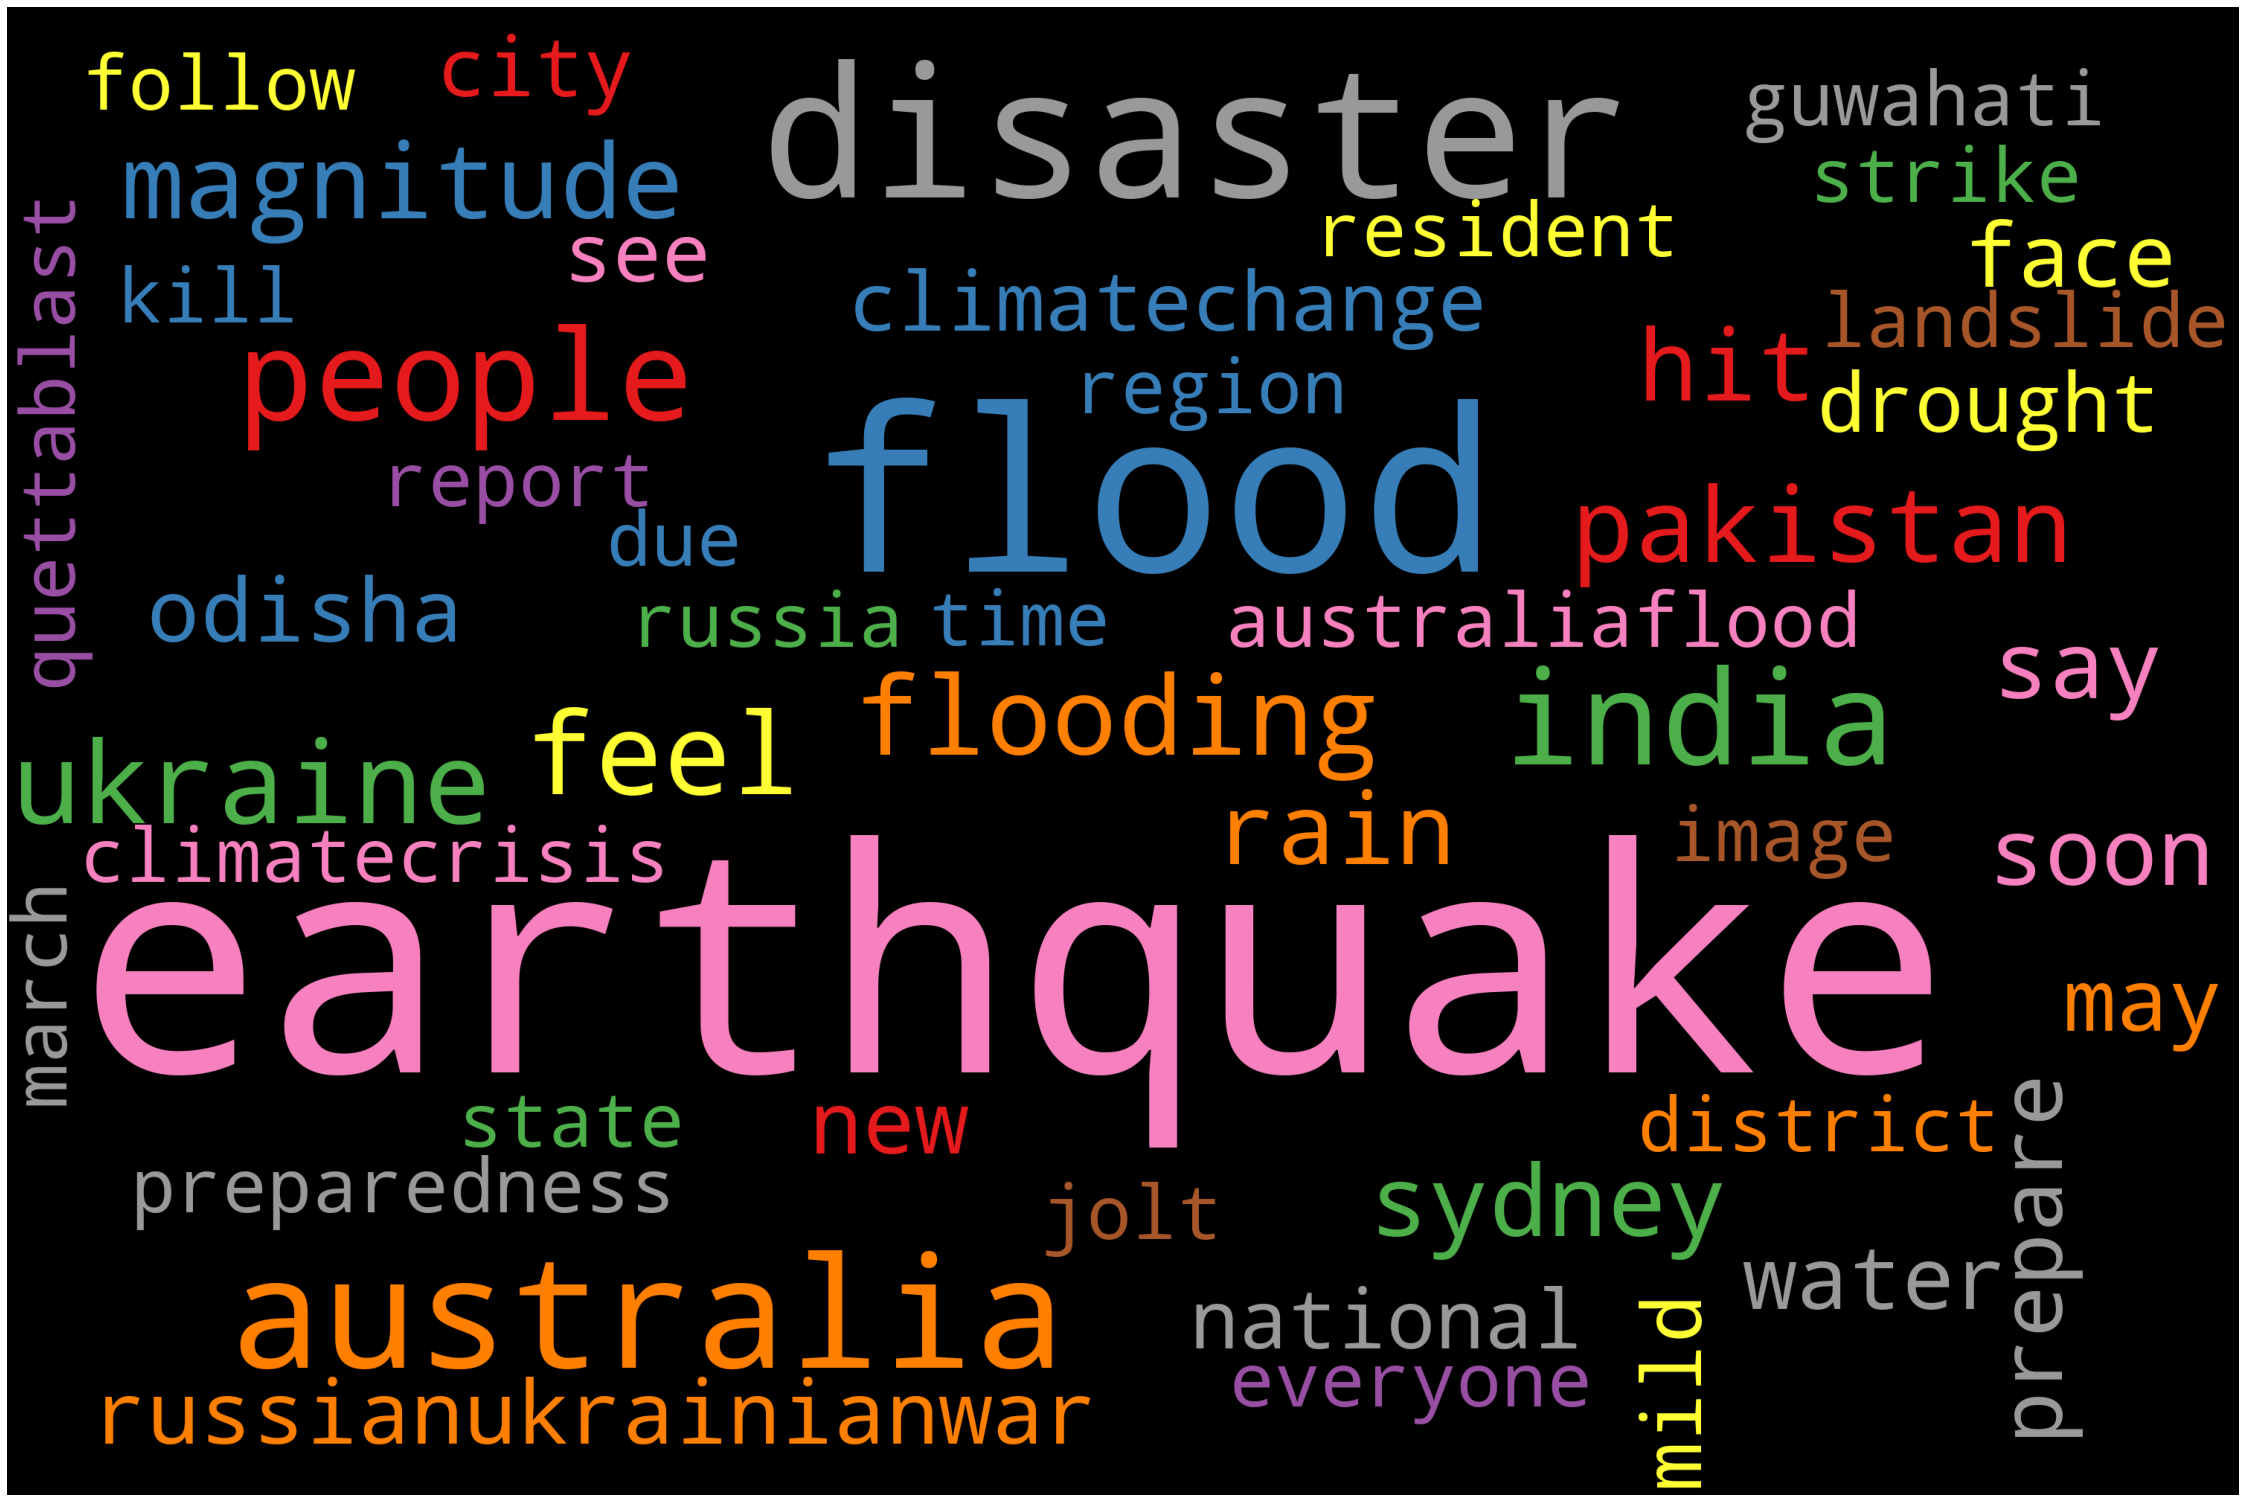

In [32]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

## Text Preprocessing for Machine Learning

In [33]:
tweets_ml = tweets.copy()
tweets_ml

,text,LABEL
0,Follow these do's and don'ts to ensure your sa...,0.0
1,#Earthquake | Do you know what to do to #StayS...,0.0
2,.@ndmaindia conducts a state-level mock exerci...,0.0
3,The intensity of the #earthquake was felt at I...,1.0
4,A 5.6-magnitude #earthquake rocked North #Sula...,1.0
...,...,...
147,#America made the people of Afghanistan a toy\...,0.0
148,"#Russian #diplomat blames #NATO's #actions, #W...",0.0
149,@antonioguterres @IPCC_CH The writing is on th...,1.0
150,Picking comedians as head of a country or a st...,0.0


In [34]:
tweets_ml.text = tweets_ml.text.apply(lambda x: re.sub(r'http\S+', '',x)) #remove Urls
tweets_ml.text = tweets_ml.text.apply(lambda x: re.sub('@[^\s]+','',x)) #remove handles
tweets_ml.text = tweets_ml.text.apply(lambda x: re.sub('[^a-zA-Z0-9]'," ",x)) #remove everything except letters and numbers

In [35]:
tweets_ml

,text,LABEL
0,Follow these do s and don ts to ensure your sa...,0.0
1,Earthquake Do you know what to do to StayS...,0.0
2,conducts a state level mock exercise on Ear...,0.0
3,The intensity of the earthquake was felt at I...,1.0
4,A 5 6 magnitude earthquake rocked North Sula...,1.0
...,...,...
147,America made the people of Afghanistan a toy ...,0.0
148,Russian diplomat blames NATO s actions W...,0.0
149,The writing is on the wall and people worldw...,1.0
150,Picking comedians as head of a country or a st...,0.0


In [36]:
tweets_ml.text = tweets_ml.text.apply(lambda x : x.split())

In [37]:
tweets_ml.text = tweets_ml.text.apply(lambda x: [word for word in x if word not in set(stopwords.words('english'))])

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
tweets_ml.text = tweets_ml.text.apply(lambda x : [ps.stem(word) for word in x]) #stemming

In [39]:
tweets_ml.text = tweets_ml.text.apply(lambda x : " ".join(x))
tweets_ml

,text,LABEL
0,follow ts ensur safeti earthquak,0.0
1,earthquak do know staysaf outdoor dure earthquak,0.0
2,conduct state level mock exercis earthquak dis...,0.0
3,the intens earthquak felt iii mmi modifi merca...,1.0
4,a 5 6 magnitud earthquak rock north sulawesi p...,1.0
...,...,...
147,america made peopl afghanistan toy one sacrif ...,0.0
148,russian diplomat blame nato action west silenc...,0.0
149,the write wall peopl worldwid face disast,1.0
150,pick comedian head countri state result disast...,0.0


### TFIDF - Feature Extraction

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tv = TfidfVectorizer()
X = tv.fit_transform(tweets_ml.text.values)
X = pd.DataFrame(X.todense(),columns = tv.get_feature_names_out())
X

,000,01,02,07,08,10,100,11,119,12,...,yamba,yespunjab,yo,yomi,yr,zamungwaziristan,zelenski,zindabad,zone,zone4solut
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
tv.vocabulary_

{'follow': 367,
 'ts': 955,
 'ensur': 322,
 'safeti': 808,
 'earthquak': 300,
 'do': 279,
 'know': 529,
 'staysaf': 880,
 'outdoor': 692,
 'dure': 297,
 'conduct': 225,
 'state': 878,
 'level': 551,
 'mock': 614,
 'exercis': 340,
 'disast': 272,
 'sikkim': 850,
 'base': 134,
 'incid': 452,
 'respons': 785,
 'system': 909,
 'ir': 482,
 'the': 924,
 'intens': 471,
 'felt': 353,
 'iii': 444,
 'mmi': 611,
 'modifi': 617,
 'mercal': 594,
 'manado': 576,
 'citi': 204,
 'capit': 181,
 'provinc': 751,
 'siau': 848,
 'island': 489,
 'north': 661,
 'minahasa': 602,
 'district': 278,
 'magnitud': 568,
 'rock': 797,
 'sulawesi': 896,
 'central': 191,
 'indonesia': 460,
 'earli': 299,
 'tuesday': 956,
 'meteorolog': 597,
 'climatolog': 215,
 'geophys': 385,
 'agenc': 74,
 'said': 809,
 'must': 633,
 'watch': 1005,
 'roast': 796,
 'video': 990,
 'part': 705,
 '50': 40,
 'minut': 607,
 'ago': 75,
 'updat': 977,
 'guwahati': 403,
 'did': 266,
 'feel': 352,
 'assam': 110,
 'india': 455,
 'who': 1027,
 

In [43]:
Y = tweets_ml.LABEL

## Machine Learning Algorithms

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 9)

### Logistic Regression

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [244]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [245]:
Y_test_pred = model1.predict(X_test)

In [246]:
metrics.accuracy_score(Y_test, Y_test_pred)

0.7741935483870968

### Decision Tree

In [247]:
from sklearn.tree import DecisionTreeClassifier

In [248]:
model2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 5)
model2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [249]:
Y_test_pred = model2.predict(X_test)

In [250]:
metrics.accuracy_score(Y_test, Y_test_pred)

0.6451612903225806

### Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [296]:
model3 = RandomForestClassifier(n_estimators = 500, max_features = 20)
model3.fit(X_train, Y_train)

RandomForestClassifier(max_features=20, n_estimators=500)

In [297]:
Y_test_pred = model3.predict(X_test)

In [298]:
metrics.accuracy_score(Y_test, Y_test_pred)

0.8064516129032258

### Bagging

In [289]:
from sklearn.ensemble import BaggingClassifier

In [290]:
model4 = BaggingClassifier(base_estimator = DecisionTreeClassifier(), max_samples = 0.8)
model4.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8)

In [291]:
Y_test_pred = model4.predict(X_test)

In [292]:
metrics.accuracy_score(Y_test, Y_test_pred)

0.6774193548387096

### K Nearest Neighbours

In [293]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [294]:
kfold = KFold(n_splits = 10)
model5 = KNeighborsClassifier(n_neighbors = 17)
results = cross_val_score(model5, X_train, Y_train, cv = kfold)
print(results.mean())

0.6102564102564103


In [295]:
n_neighbors = np.array(range(10,40))
param_grid = dict(n_neighbors = n_neighbors)

#### Grid Search for KNN

In [177]:
model5 = KNeighborsClassifier()
grid = GridSearchCV(estimator = model5, param_grid = param_grid, cv = 10)
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])})

In [178]:
print(grid.best_score_)
print(grid.best_params_)

0.6525641025641026
{'n_neighbors': 14}


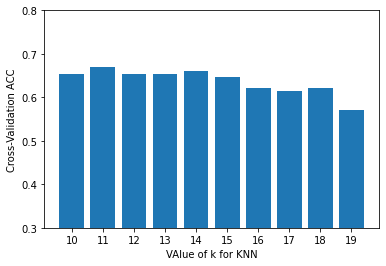

In [100]:
import matplotlib.pyplot as plt
k_range = range(10,20)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, Y_train, cv = 10)
    k_scores.append(scores.mean())
    
plt.bar(k_range, k_scores)
plt.xlabel('VAlue of k for KNN')
plt.xticks(k_range)
plt.ylabel("Cross-Validation ACC")
plt.ylim(0.3,0.8)
plt.show()

#### KNN model on Best Parameters

In [179]:
model5 = KNeighborsClassifier(n_neighbors = 14)
model5.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [180]:
Y_pred = model5.predict(X_test)

In [181]:
metrics.accuracy_score(Y_test, Y_pred)

0.6774193548387096

### Support Vector Classifier

In [182]:
from sklearn import svm
from sklearn.svm import SVC

In [183]:
model6 = SVC(kernel = 'rbf', gamma = 0.01)
model6.fit(X_train, Y_train)

SVC(gamma=0.01)

In [184]:
Y_pred = model6.predict(X_test)

In [185]:
metrics.accuracy_score(Y_test, Y_pred)

0.5483870967741935

#### Grid Search for SVC

In [186]:
model6 = SVC()
param_grid = [{'kernel': ['rbf'], 'gamma' : [10,5,1,0.5,0.1,0.01, 0.001, 0.0001], 'C' : [0.1,1,5,10,11,12,13,14,15]}]

In [187]:
gsv = GridSearchCV(model6, param_grid, cv = 10)
gsv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 5, 10, 11, 12, 13, 14, 15],
                          'gamma': [10, 5, 1, 0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [188]:
gsv.best_params_, gsv.best_score_

({'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}, 0.7852564102564102)

#### SVC model on Best Params

In [189]:
model6 = SVC(C = 5, gamma = 0.1, kernel = 'rbf')
model6.fit(X_train, Y_train)

SVC(C=5, gamma=0.1)

In [190]:
Y_pred = model6.predict(X_test)

In [191]:
metrics.accuracy_score(Y_test, Y_pred)

0.7096774193548387

### Boosting

#### XGB

In [192]:
from xgboost import XGBClassifier

In [193]:
model7A = XGBClassifier(n_estimators = 100)
model7A.fit(X_train, Y_train)

C:\Users\shand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [194]:
Y_pred = model7A.predict(X_test)

In [195]:
metrics.accuracy_score(Y_test, Y_pred)

0.5483870967741935

#### AdaBoost

In [196]:
from sklearn.ensemble import AdaBoostClassifier

In [197]:
model7B = AdaBoostClassifier(n_estimators = 50)
model7B.fit(X_train, Y_train)

AdaBoostClassifier()

In [198]:
Y_pred = model7B.predict(X_test)

In [199]:
metrics.accuracy_score(Y_test, Y_pred)

0.7096774193548387

### Naive Bayes

#### Bernoulli Naive Bayes

In [230]:
from sklearn.naive_bayes import BernoulliNB

In [231]:
model8 = BernoulliNB()
model8.fit(X_train, Y_train)

BernoulliNB()

In [232]:
Y_pred = model8.predict(X_test)

In [233]:
metrics.accuracy_score(Y_test, Y_pred)

0.8064516129032258

#### Multinomial Naive Bayes

In [234]:
from sklearn.naive_bayes import MultinomialNB

In [235]:
model8B = MultinomialNB()
model8B.fit(X_train, Y_train)

MultinomialNB()

In [236]:
Y_pred = model8B.predict(X_test)

In [237]:
metrics.accuracy_score(Y_test, Y_pred)

0.7741935483870968

## Final Model with all Data

### Random Forest

In [299]:
ModelFinal1 = RandomForestClassifier(n_estimators = 500, max_features = 20)
ModelFinal1.fit(X_train,Y_train)

RandomForestClassifier(max_features=20, n_estimators=500)

In [300]:
Y_pred = ModelFinal1.predict(X)

In [301]:
metrics.accuracy_score(Y, Y_pred)

0.9407894736842105

### Bernoulli's Naive Bayes

In [238]:
ModelFinal2 = BernoulliNB()
ModelFinal2.fit(X_train, Y_train)

BernoulliNB()

In [239]:
Y_pred = ModelFinal2.predict(X)

In [240]:
metrics.accuracy_score(Y, Y_pred)

0.9144736842105263